# Airbnb project

## Import relevant packages

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Data gathering

In [40]:
df_listings = pd.read_csv('data/listings.csv.gz')
df_calender = pd.read_csv('data/calendar.csv.gz')
df_reviews = pd.read_csv('data/reviews.csv.gz')

C:\Users\yu298\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Assessing

Let's take a look at the data and see how we can answer the question.
First investigate the reviews data

In [67]:
df_reviews = pd.read_csv('data/reviews.csv.gz')

In [68]:
df_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
...,...,...,...,...,...,...
517821,43228210,624655698,2020-05-13,224347873,Kristin,Manuel was the most hospitable host I have eve...
517822,43330380,624385739,2020-05-10,345757169,Bennet,Top
517823,43339602,624659521,2020-05-13,939311,Jonathan,"Schnelle Kommunikation, das Studio ist neu und..."
517824,43363126,624200722,2020-05-08,345542688,Ernest,Super freundlicher Gastgeber ! Ich war sehr zu...


In [70]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517826 entries, 0 to 517825
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     517826 non-null  int64 
 1   id             517826 non-null  int64 
 2   date           517826 non-null  object
 3   reviewer_id    517826 non-null  int64 
 4   reviewer_name  517826 non-null  object
 5   comments       517498 non-null  object
dtypes: int64(3), object(3)
memory usage: 23.7+ MB


There are no missing values, the data is clean, except for the data type of date.  Let's fix this quickly.

In [71]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

Now lets find out how the number of Airbnb usage has changed over the past decade.  For this, I would simply count the number of reviews as the number of usage.  Leaving a review is not mandatory and thus the figure will not be accurate representative of the total number of usage.  However, I would assume that the portion of customers leaving a review is somewhat constant, and this assumption suffice the purpose of studying the general trend in the Airbnb usage.

In [115]:
df_grouped=df_reviews.groupby([df_reviews['date'].dt.to_period('M')]).size().reset_index(name='count')
df_grouped['3month_RA']=df_grouped.rolling(3).mean()
df_grouped

,date,count,3month_RA
0,2009-06,1,NaN
1,2009-08,1,NaN
2,2009-11,1,1.000000
3,2010-02,1,1.000000
4,2010-04,1,1.000000
...,...,...,...
121,2020-01,13152,13338.000000
122,2020-02,13708,13262.000000
123,2020-03,8517,11792.333333
124,2020-04,912,7712.333333


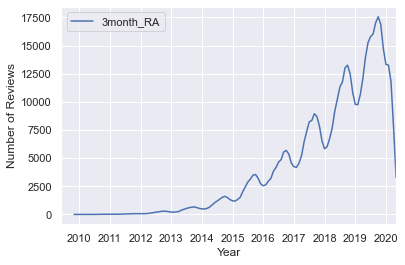

In [116]:
ax=df_grouped.plot(x='date', y='3month_RA', kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
plt.show()

There are few points we can observe from the plot.
- The number of Airbnb usage has been steadily increasing every year.
- There is a periodic pattern that the usage increase during summer and decrease during winter period.
- There is a drastic decrease in usage in the 2020.  Most probably caused by the global pandemic.

Now lets see how the number of listings have changed.  

In [131]:
df_grouped=df_reviews.groupby([df_reviews['date'].dt.to_period('M')])['listing_id'].nunique()
df_grouped=pd.DataFrame(df_grouped).reset_index()
df_grouped['3month_RA']=df_grouped.rolling(3).mean()
df_grouped

,date,listing_id,3month_RA
0,2009-06,1,NaN
1,2009-08,1,NaN
2,2009-11,1,1.000000
3,2010-02,1,1.000000
4,2010-04,1,1.000000
...,...,...,...
121,2020-01,5643,5266.333333
122,2020-02,5226,5304.333333
123,2020-03,4572,5147.000000
124,2020-04,645,3481.000000


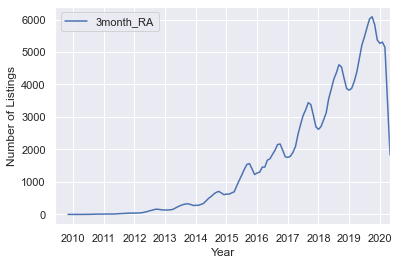

In [133]:
ax=df_grouped.plot(x='date', y='3month_RA', kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Listings')
plt.show()

## Data Cleaning

## Data analysis

## Data Modeling

## Data Visualisation